# Linear Regression

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
import yfinance as yf
import matplotlib.pyplot as plt

# Including the dataset

In [2]:
df=yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [3]:
df.reset_index(inplace=True)
df=df[['Date','Close']]
df1=df
# showing first 5 rows of data
df.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


# Plotting the growth trend of bitcoin prices

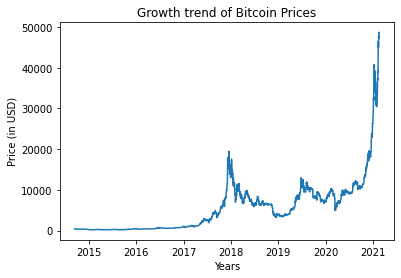

In [4]:
plt.title('Growth trend of Bitcoin Prices')
plt.xlabel('Years')
plt.ylabel('Price (in USD)')
plt.plot(df['Date'],df['Close']);

# Creating the usable data

In [5]:
# Removing the 'Date' column 
df = df[['Close']]

In [6]:
# variable for predicting 'n' days out into the future , here n=30 days
forecast_out = int(30)

In [7]:
# creating another column shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-forecast_out)

In [8]:
# Creating the independent dataset
X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

In [9]:
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

In [10]:
# Creating the dependent dataset
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [11]:
# Splitting into Training and Testing Data

In [12]:
from sklearn.model_selection import train_test_split

# split the data into 80% training data, 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Model selection : Linear Regression

In [13]:
# Creating and training the Linear Regression model
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

# Accuracy score

In [14]:
# Testing the model
confidence = clf.score(X_test, y_test)
print("Accuracy is: %.2f"%(confidence*100),"%")

Accuracy is: 88.65 %


In [15]:
# Printing the predicted values of the test data
linear_regr_prediction=clf.predict(X_test)
# print(linear_regr_prediction)
# print()
# Printing the actual values of the test data
# print(y_test)

In [16]:
# creating data frame containing the actual test data and correspondinding predicted value
test_data_prediction={}
test_data_prediction['Actual Test data']=y_test
test_data_prediction['Prediction']=linear_regr_prediction
testDataPrediction=pd.DataFrame(test_data_prediction)
testDataPrediction

,Actual Test data,Prediction
0,3779.129883,7209.511786
1,241.832001,21.831214
2,10360.546875,11325.393855
3,5289.770996,4308.641731
4,11489.700195,10309.869320
...,...,...
457,10599.105469,11432.404609
458,1998.859985,2581.380203
459,8222.078125,11475.144309
460,236.326004,-11.377518


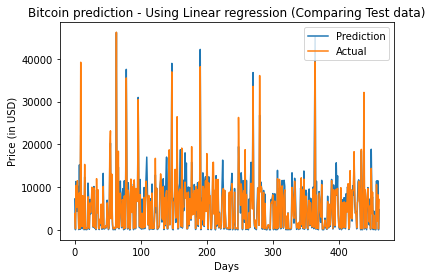

In [17]:
plt.title('Bitcoin prediction - Using Linear regression (Comparing Test data)')
plt.xlabel('Days')
plt.ylabel('Price (in USD)')
plt.plot(linear_regr_prediction)

plt.plot(y_test);
plt.legend(['Prediction','Actual']);

In [18]:
# Printing the model predictions for next 30 days
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[40989.75404109 41956.45121159 41310.75141618 40709.09348886
 35267.02131944 37779.50117374 36698.33701365 36953.88384195
 37042.64060883 37277.12090113 34813.92084946 36216.55733272
 39289.97113    39235.96210501 37904.65787156 38391.94559967
 40665.92048313 42926.85792921 42297.57648122 43701.57703338
 44994.31818372 44576.4629131  52981.53132907 53309.57414253
 51508.33691894 54955.57762438 54489.4217095  54029.19476735
 55886.73247162 55803.61430637]


In [19]:
actual_last_30=np.array(df['Close'][-forecast_out:])
actual_last_30

array([35791.27734375, 36630.07421875, 36069.8046875 , 35547.75      ,
       30825.69921875, 33005.76171875, 32067.64257812, 32289.37890625,
       32366.39257812, 32569.84960938, 30432.546875  , 31649.60546875,
       34316.38671875, 34269.5234375 , 33114.359375  , 33537.17578125,
       35510.2890625 , 37472.08984375, 36926.06640625, 38144.30859375,
       39266.01171875, 38903.44140625, 46196.46484375, 46481.10546875,
       44918.18359375, 47909.33203125, 47504.8515625 , 47105.515625  ,
       48717.2890625 , 48645.16796875])

In [20]:
# Creating dictionary with keys: 'Actual' and 'Predicted' values for the next 30 days
data={}
data['Date']=list(df1['Date'][-forecast_out:])
data['Actual']=list(actual_last_30)
data['Prediction']=list(forecast_prediction)


In [21]:
# Creating DataFrame for 'Actual' and 'Predicted' values for the next 30 days
result_df_30days=pd.DataFrame(data)
result_df_30days

,Date,Actual,Prediction
0,2021-01-17,35791.277344,40989.754041
1,2021-01-18,36630.074219,41956.451212
2,2021-01-19,36069.804688,41310.751416
3,2021-01-20,35547.750000,40709.093489
4,2021-01-21,30825.699219,35267.021319
5,2021-01-22,33005.761719,37779.501174
6,2021-01-23,32067.642578,36698.337014
7,2021-01-24,32289.378906,36953.883842
8,2021-01-25,32366.392578,37042.640609
9,2021-01-26,32569.849609,37277.120901


# Comparison plot

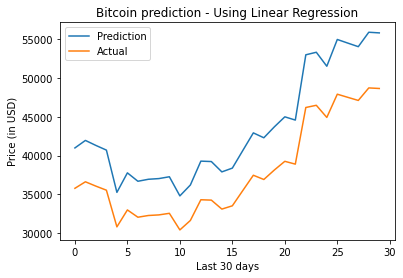

In [22]:
# Comparison plot for comparing 'Actual' and 'Predicted' values
plt.title('Bitcoin prediction - Using Linear Regression')
plt.xlabel('Last 30 days')
plt.ylabel('Price (in USD)')
plt.plot(result_df_30days['Prediction'])

plt.plot(result_df_30days['Actual']);
plt.legend(['Prediction','Actual']);